In [ ]:

#Question 5
#Is there a connection between vehicle brand and consumer rating?
#Reliability?
#Does Reliability help with the vehicle brand?
#Comfort? 
#Does the comfort rating score change with the brand of the vehicle(exp. Luxury cars score high in comfort)?
#How are consumer rating and comfort rating compare?
#Performance?
#Does Performance rating change with the vehicle brands?
#Does the performance rating have a similar rating as consumer rating?
#Overall?
#Does all of the ratings help find the best vehicle brand?
#How does all of the ratings affect the vehicle brand?


#Ferri not good enough cuz not enough simple data on it(there is only 1 ferrir in the entire)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
car_sale_data = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

In [11]:
car_sale_data

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [12]:
# Load the database into a pandas dataframe
car_sale_data = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

# Remove the dollar sign from the 'Price' column
car_sale_data['Price'] = car_sale_data['Price'].str.replace('$', '')

# Remove the comma from the 'Price' column
car_sale_data['Price'] = car_sale_data['Price'].str.replace(',', '')

# Remove the "Not Priced" from the 'Price' column
car_sale_data = car_sale_data[car_sale_data['Price']!= 'Not Priced']

# Turn 'Price' into all ints
car_sale_data['Price'] = car_sale_data['Price'].astype(int)


car_sale_data

/var/folders/s0/6td_1_5n7m94_g09f8k7mnz00000gn/T/ipykernel_19685/3243639420.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_sale_data['Price'] = car_sale_data['Price'].str.replace('$', '')


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [22]:
brand_ratings = car_sale_data.groupby('Make')['ConsumerRating'].mean().sort_values(ascending=False)
brand_ratings



Make
Ferrari          5.000000
Genesis          4.836842
Mazda            4.813171
Volvo            4.795946
Porsche          4.779851
RAM              4.777931
Mitsubishi       4.775000
Dodge            4.774483
Honda            4.772817
Lamborghini      4.771429
Kia              4.765417
Lexus            4.762397
Audi             4.758491
Jaguar           4.756667
BMW              4.754083
Alfa             4.747368
Chrysler         4.746154
Toyota           4.745671
Hyundai          4.741509
Jeep             4.740081
MINI             4.740000
Nissan           4.727888
Maserati         4.726667
Ford             4.722241
Buick            4.714035
Subaru           4.709355
Mercedes-Benz    4.690247
Acura            4.681818
INFINITI         4.670833
Volkswagen       4.655714
GMC              4.637600
Chevrolet        4.630769
Lincoln          4.620833
Cadillac         4.584615
Bentley          4.583333
Saturn           4.500000
Scion            4.425000
Mercury          4.300000
FIAT   

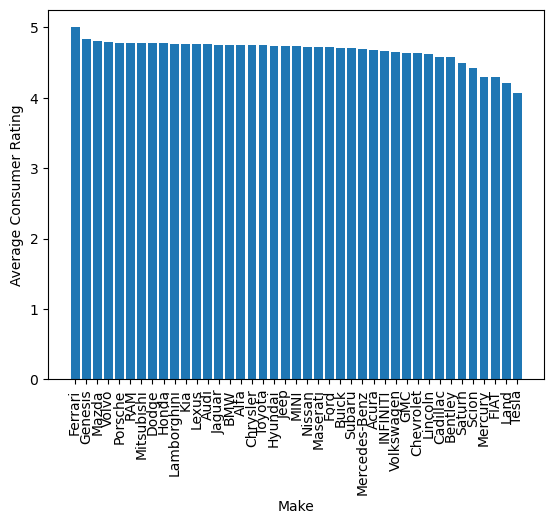

In [39]:
plt.bar(brand_ratings.index,brand_ratings.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Average Consumer Rating')
plt.show()


In [42]:
brand_reliab = car_sale_data.groupby('Make')['ReliabilityRating'].mean().sort_values(ascending=False)
brand_reliab


Make
Ferrari          5.000000
Mitsubishi       4.895000
Lexus            4.843802
MINI             4.840000
Toyota           4.820828
Mazda            4.818049
Kia              4.807500
Porsche          4.793284
Honda            4.786197
Genesis          4.773684
Dodge            4.767586
Subaru           4.763226
Hyundai          4.755660
Volvo            4.752703
Audi             4.740802
Maserati         4.740000
Jaguar           4.736667
Scion            4.725000
Nissan           4.723904
Jeep             4.722065
Buick            4.713158
RAM              4.710345
Acura            4.705195
Chrysler         4.705128
Ford             4.699483
INFINITI         4.691667
BMW              4.689396
Volkswagen       4.682857
Chevrolet        4.616587
Mercedes-Benz    4.616296
Alfa             4.597368
GMC              4.558400
Lincoln          4.533333
Cadillac         4.475920
Bentley          4.400000
Lamborghini      4.378571
Saturn           4.200000
Mercury          4.150000
FIAT   

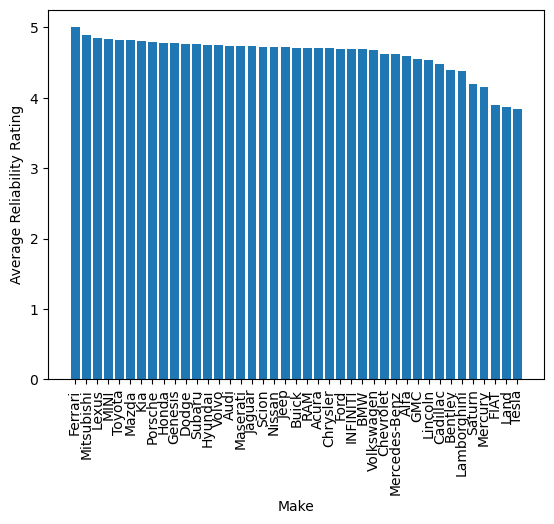

In [43]:
plt.bar(brand_reliab.index,brand_reliab.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Average Reliability Rating')
plt.show()


In [44]:
brand_comfort = car_sale_data.groupby('Make')['ComfortRating'].mean().sort_values(ascending=False)
brand_comfort


Make
Ferrari          5.000000
Volvo            4.925000
RAM              4.875862
Genesis          4.863158
Dodge            4.849655
Maserati         4.840000
BMW              4.834358
Lexus            4.824793
Kia              4.820000
Audi             4.819811
Jeep             4.813360
Porsche          4.803731
Mazda            4.802927
Honda            4.802817
Saturn           4.800000
INFINITI         4.799537
Nissan           4.798805
Ford             4.797931
Hyundai          4.795755
Chrysler         4.794872
Jaguar           4.783333
Acura            4.770996
Mercedes-Benz    4.768642
Toyota           4.767629
Mitsubishi       4.765000
Buick            4.763158
Subaru           4.761613
Lincoln          4.758333
GMC              4.747600
Volkswagen       4.732143
Cadillac         4.727759
Alfa             4.713158
Chevrolet        4.686538
MINI             4.580000
Mercury          4.550000
Bentley          4.500000
FIAT             4.500000
Lamborghini      4.421429
Land   

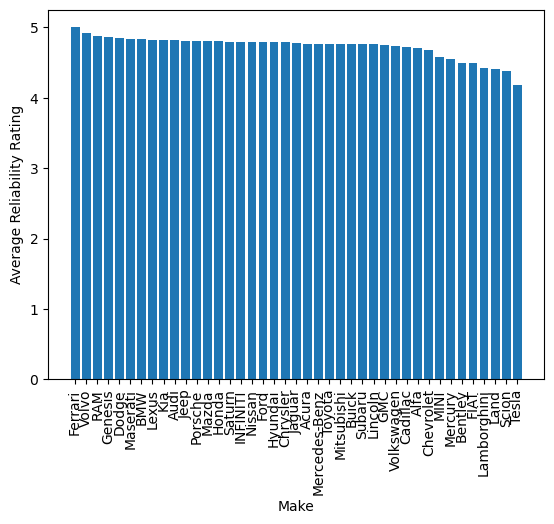

In [45]:
plt.bar(brand_comfort.index,brand_comfort.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Average Comfort Rating')
plt.show()

In [66]:
brand_comfort = car_sale_data.groupby('Make')['ComfortRating'].mean().sort_values(ascending=False)
brand_ratings = car_sale_data.groupby('Make')['ConsumerRating'].mean().sort_values(ascending=False)
brand_ratings, brand_comfort

(Make
 Ferrari          5.000000
 Genesis          4.836842
 Mazda            4.813171
 Volvo            4.795946
 Porsche          4.779851
 RAM              4.777931
 Mitsubishi       4.775000
 Dodge            4.774483
 Honda            4.772817
 Lamborghini      4.771429
 Kia              4.765417
 Lexus            4.762397
 Audi             4.758491
 Jaguar           4.756667
 BMW              4.754083
 Alfa             4.747368
 Chrysler         4.746154
 Toyota           4.745671
 Hyundai          4.741509
 Jeep             4.740081
 MINI             4.740000
 Nissan           4.727888
 Maserati         4.726667
 Ford             4.722241
 Buick            4.714035
 Subaru           4.709355
 Mercedes-Benz    4.690247
 Acura            4.681818
 INFINITI         4.670833
 Volkswagen       4.655714
 GMC              4.637600
 Chevrolet        4.630769
 Lincoln          4.620833
 Cadillac         4.584615
 Bentley          4.583333
 Saturn           4.500000
 Scion            4.42

In [67]:
brand_Perf = car_sale_data.groupby('Make')['PerformanceRating'].mean().sort_values(ascending=False)
brand_Perf


Make
Ferrari          5.000000
Lamborghini      5.000000
Porsche          4.894030
Alfa             4.884211
Jaguar           4.880000
BMW              4.842100
Bentley          4.833333
Maserati         4.833333
MINI             4.800000
Genesis          4.784211
RAM              4.782069
Volvo            4.775000
Audi             4.773349
Dodge            4.772414
Mazda            4.770732
Lexus            4.741322
Kia              4.737500
Jeep             4.714372
Chrysler         4.712821
Honda            4.710704
Ford             4.706552
Mitsubishi       4.705000
Toyota           4.700753
Mercedes-Benz    4.679506
Nissan           4.660159
GMC              4.657200
Subaru           4.652258
Acura            4.642424
Buick            4.637719
INFINITI         4.623611
Hyundai          4.622642
Lincoln          4.621667
Tesla            4.606452
Chevrolet        4.604327
Volkswagen       4.564286
Cadillac         4.542475
Saturn           4.300000
Scion            4.300000
Land   

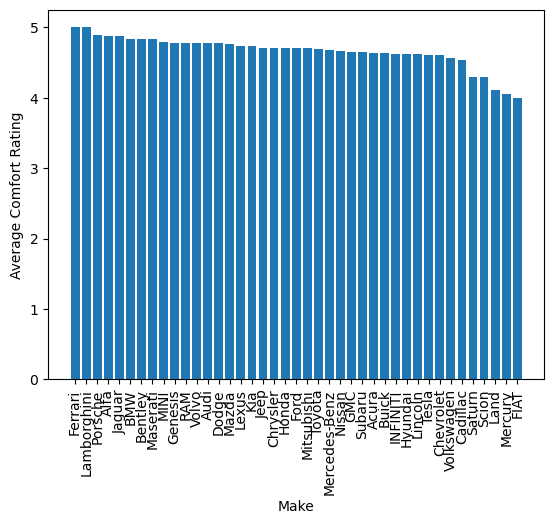

In [68]:
plt.bar(brand_Perf.index,brand_Perf.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Average Performce Rating')
plt.show()

In [70]:
brand_Perf = car_sale_data.groupby('Make')['PerformanceRating'].mean().sort_values(ascending=False)
brand_ratings = car_sale_data.groupby('Make')['ConsumerRating'].mean().sort_values(ascending=False)
brand_ratings, brand_Perf


(Make
 Ferrari          5.000000
 Genesis          4.836842
 Mazda            4.813171
 Volvo            4.795946
 Porsche          4.779851
 RAM              4.777931
 Mitsubishi       4.775000
 Dodge            4.774483
 Honda            4.772817
 Lamborghini      4.771429
 Kia              4.765417
 Lexus            4.762397
 Audi             4.758491
 Jaguar           4.756667
 BMW              4.754083
 Alfa             4.747368
 Chrysler         4.746154
 Toyota           4.745671
 Hyundai          4.741509
 Jeep             4.740081
 MINI             4.740000
 Nissan           4.727888
 Maserati         4.726667
 Ford             4.722241
 Buick            4.714035
 Subaru           4.709355
 Mercedes-Benz    4.690247
 Acura            4.681818
 INFINITI         4.670833
 Volkswagen       4.655714
 GMC              4.637600
 Chevrolet        4.630769
 Lincoln          4.620833
 Cadillac         4.584615
 Bentley          4.583333
 Saturn           4.500000
 Scion            4.42

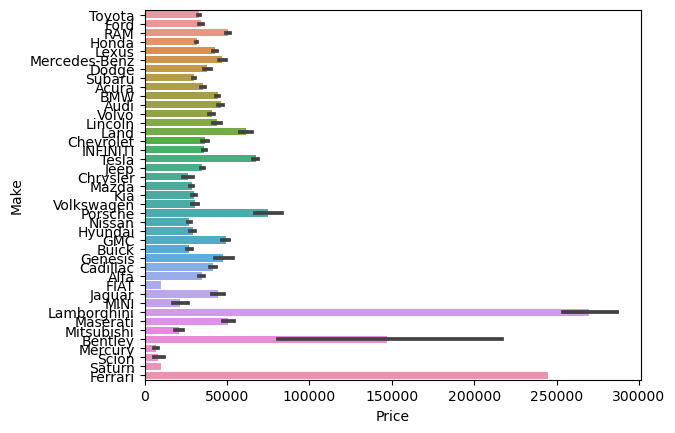

In [59]:
sns.barplot(x=car_sale_data['Price'], y=car_sale_data['Make']);

In [14]:
brand_names = car_sale_data['Make'].unique()

for Makes in brand_names:
    print(Makes)

Toyota
Ford
RAM
Honda
Lexus
Mercedes-Benz
Dodge
Subaru
Acura
BMW
Audi
Volvo
Lincoln
Land
Chevrolet
INFINITI
Tesla
Jeep
Chrysler
Mazda
Kia
Volkswagen
Porsche
Nissan
Hyundai
GMC
Buick
Genesis
Cadillac
Alfa
FIAT
Jaguar
MINI
Lamborghini
Maserati
Mitsubishi
Bentley
Mercury
Scion
Saturn
Ferrari
